Predicting players rating

In this project you are going to predict the overall rating of soccer player based on their attributes 
such as 'crossing', 'finishing etc.
The dataset you are going to use is from European Soccer Database (https://www.kaggle.com/hugomathien/soccer) 
has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016.

The dataset comes in the form of an SQL database and contains statistics of about 25,000 football matches, from the top football league of 11 European Countries. It covers seasons from 2008 to 2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations, with player names and a pair of coordinates to indicate their position on the pitch.
+25,000 matches
+10,000 players
11 European Countries with their lead championship
Seasons 2008 to 2016
Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
Team line up with squad formation (X, Y coordinates)
Betting odds from up to 10 providers

Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches
The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video games. It is not just the stats that come with a new version of the game but also the weekly updates. So for instance if a player has performed poorly over a period of time and his stats get impacted in FIFA, you would normally see the same in the dataset.

In [4]:
# Import the libraries needed for the analysis

import sqlite3
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as statsmodels
import numpy as np
import seaborn as sns

In [5]:
# Create connection and get the data from the database into a dataframe.

cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [6]:
# Display the Loaded data

df.head(5).transpose()

,0,1,2,3,4
id,1,2,3,4,5
player_fifa_api_id,218353,218353,218353,218353,218353
player_api_id,505942,505942,505942,505942,505942
date,2016-02-18 00:00:00,2015-11-19 00:00:00,2015-09-21 00:00:00,2015-03-20 00:00:00,2007-02-22 00:00:00
overall_rating,67,67,62,61,61
potential,71,71,66,65,65
preferred_foot,right,right,right,right,right
attacking_work_rate,medium,medium,medium,medium,medium
defensive_work_rate,medium,medium,medium,medium,medium
crossing,49,49,49,48,48


In [7]:
# Display the columns of the dataframe. 

df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [8]:
# Display the shape of the dataframe

df.shape

(183978, 42)

In [9]:
# Get the details of the data

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


In [10]:
# Check if there are nulls in the data. 

df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [11]:
# Drop the columns with null values 

df=df.dropna()

In [12]:
# Display the new shape of the dataframe after dropping the nulls 

df.shape

(180354, 42)

In [13]:
# Select the columns that have impacts to the overall rating. 

cols = ['potential','crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']


In [14]:
# Check the correlation of the different parameters to the overall rating of the player

correlations = [ df['overall_rating'].corr(df[f]) for f in cols ]
correlations

[0.7654346716757741,
 0.3573201803543208,
 0.33007854277118553,
 0.31332410055165116,
 0.458242655815442,
 0.36173949987250636,
 0.35419060093846744,
 0.35756576910945237,
 0.34980031144238866,
 0.43452499155719804,
 0.443990762826299,
 0.2439984883712968,
 0.25304806290254583,
 0.2399628207884931,
 0.7718560966627348,
 0.1602107785208074,
 0.4280531322219387,
 0.2589783181304958,
 0.3256056577869246,
 0.31568376240757984,
 0.39266797289955563,
 0.3227818681524762,
 0.24909402566182123,
 0.36897763914725196,
 0.43149329504794093,
 0.39271510791118897,
 0.13218473835173347,
 0.16398609375977696,
 0.1280540129512115,
 0.027674967162302385,
 0.006717294838212125,
 0.02879910388429601,
 0.00802927027624539,
 0.007803569907558567]

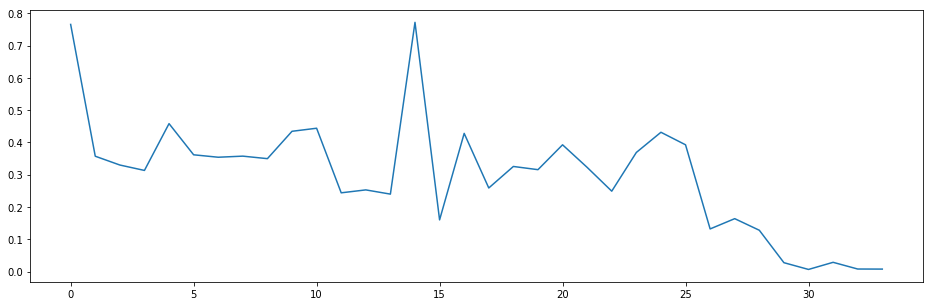

In [15]:
# Show the overall rating vs the parameters. 

cols1= np.arange(34)
plt.figure(figsize=(16,5))
plt.plot(cols1, correlations)
plt.show()

In [16]:
# Statisctical analysis of the data

X = df[cols]
Y=df['overall_rating']
model = statsmodels.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.198e+06
Date:                Thu, 10 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:21:37   Log-Likelihood:            -4.4209e+05
No. Observations:              180354   AIC:                         8.842e+05
Df Residuals:                  180320   BIC:                         8.846e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
potential              0.3557      0.001    263.154      0.000       0.353       0.358
crossing               0.0221      0.001     26.238      0.000       0.020       0.024
finishing              0.0100      0.001     10.832      0.000       0.008       0.012
heading_accuracy       0.0667      0.001     81.261      0.000       0.065       0.068
short_passing          0.0460      0.001     33.197      0.000       0.043       0.049
volleys                0.0048      0.001      5.771      0.000       0.003       0.006
dribbling             -0.0127      0.001    -10.801      0.000      -0.015      -0.010
curve                  0.0112      0.001     13.877      0.000       0.010       0.013
free_kick_accuracy     0.0109      0.001     15.233      0.000       0.009       0.012
long_passing           0.0080      0.001      8.369      0.000       0.006       0.010
ball_control           0.1359      0.002     84.966      0.000       0.133       0.139
acceleration           0.0059      0.001      4.240      0.000       0.003       0.009
sprint_speed           0.0071      0.001      5.351      0.000       0.004       0.010
agility               -0.0150      0.001    -14.819      0.000      -0.017      -0.013
reactions              0.2149      0.001    197.780      0.000       0.213       0.217
balance                0.0009      0.001      1.229      0.219      -0.001       0.002
shot_power             0.0172      0.001     19.413      0.000       0.015       0.019
jumping                0.0146      0.001     19.848      0.000       0.013       0.016
stamina               -0.0060      0.001     -7.350      0.000      -0.008      -0.004
strength               0.0504      0.001     63.409      0.000       0.049       0.052
long_shots            -0.0116      0.001    -12.548      0.000      -0.013      -0.010
aggression             0.0208      0.001     30.087      0.000       0.019       0.022
interceptions          0.0142      0.001     19.106      0.000       0.013       0.016
positioning           -0.0081      0.001    -10.202      0.000      -0.010      -0.007
vision                -0.0012      0.001     -1.326      0.185      -0.003       0.001
penalties              0.0137      0.001     18.085      0.000       0.012       0.015
marking                0.0307      0.001     27.118      0.000       0.028       0.033
standing_tackle        0.0037      0.001      2.789      0.005       0.001       0.006
sliding_tackle        -0.0297      0.001    -26.719      0.000      -0.032      -0.028
gk_diving              0.1624      0.001    110.000      0.000       0.160       0.165
gk_handling            0.0292      0.002     15.130      0.000       0.025       0.033
gk_kicking            -0.0314      0.001    -50.077      0.000      -0.033      -0.030
gk_positioning         0.0511      0.0

In [17]:
# Split the data into test and train for analysis 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=50)
print('X_train:\t',X_train.shape)
print('Y_train:\t',Y_train.shape)
print('X_test:\t\t',X_test.shape)
print('Y_test:\t\t',Y_test.shape)

X_train:	 (135265, 34)
Y_train:	 (135265,)
X_test:		 (45089, 34)
Y_test:		 (45089,)


In [18]:
# Fitting Regression Model 
X_train = statsmodels.add_constant(X_train)
X_test = statsmodels.add_constant(X_test)

# Create a Model for Training Set
model_train = statsmodels.OLS(Y_train, X_train).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                 2.118e+04
Date:                Thu, 10 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:21:39   Log-Likelihood:            -3.3116e+05
No. Observations:              135265   AIC:                         6.624e+05
Df Residuals:                  135230   BIC:                         6.627e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.7110      0.109    -34.054      0.000      -3.925      -3.497
potential              0.3782      0.002    223.475      0.000       0.375       0.382
crossing               0.0218      0.001     22.380      0.000       0.020       0.024
finishing              0.0117      0.001     10.990      0.000       0.010       0.014
heading_accuracy       0.0700      0.001     73.756      0.000       0.068       0.072
short_passing          0.0507      0.002     31.622      0.000       0.048       0.054
volleys                0.0043      0.001      4.517      0.000       0.002       0.006
dribbling             -0.0130      0.001     -9.603      0.000      -0.016      -0.010
curve                  0.0112      0.001     12.035      0.000       0.009       0.013
free_kick_accuracy     0.0128      0.001     15.483      0.000       0.011       0.014
long_passing           0.0068      0.001      6.208      0.000       0.005       0.009
ball_control           0.1358      0.002     73.583      0.000       0.132       0.139
acceleration           0.0076      0.002      4.752      0.000       0.004       0.011
sprint_speed           0.0086      0.002      5.640      0.000       0.006       0.012
agility               -0.0080      0.001     -6.799      0.000      -0.010      -0.006
reactions              0.2109      0.001    167.582      0.000       0.208       0.213
balance                0.0079      0.001      8.703      0.000       0.006       0.010
shot_power             0.0174      0.001     17.057      0.000       0.015       0.019
jumping                0.0154      0.001     18.242      0.000       0.014       0.017
stamina               -0.0050      0.001     -5.350      0.000      -0.007      -0.003
strength               0.0618      0.001     63.467      0.000       0.060       0.064
long_shots            -0.0140      0.001    -13.173      0.000      -0.016      -0.012
aggression             0.0198      0.001     24.921      0.000       0.018       0.021
interceptions          0.0120      0.001     13.960      0.000       0.010       0.014
positioning           -0.0123      0.001    -13.313      0.000      -0.014      -0.010
vision                -0.0015      0.001     -1.517      0.129      -0.004       0.000
penalties              0.0145      0.001     16.636      0.000       0.013       0.016
marking                0.0321      0.001     24.695      0.000       0.030       0.035
standing_tackle        0.0027      0.002      1.772      0.076      -0.000       0.006
sliding_tackle        -0.0276      0.001    -21.568      0.000      -0.030      -0.025
gk_diving              0.1618      0.002     95.217      0.000       0.158       0.165
gk_handling            0.0336      0.002     15.105      0.000       0.029       0.038
gk_kicking            -0.0341      0.0

In [19]:
# Perform Linear Regression on the data.

lrm = LinearRegression()
lrm.fit(X_train, Y_train)

# Print the coefficients for the parameters. 
lrm.coef_

array([-1.05586893e-18,  3.78222730e-01,  2.17791228e-02,  1.17449284e-02,
        7.00170011e-02,  5.06709473e-02,  4.32374808e-03, -1.29893606e-02,
        1.11617451e-02,  1.27573920e-02,  6.80479731e-03,  1.35757251e-01,
        7.62356512e-03,  8.57187195e-03, -8.01743878e-03,  2.10902729e-01,
        7.90209713e-03,  1.73733919e-02,  1.54185252e-02, -5.03794703e-03,
        6.18182967e-02, -1.40487981e-02,  1.98487981e-02,  1.19612176e-02,
       -1.22613980e-02, -1.54178597e-03,  1.44777660e-02,  3.21135847e-02,
        2.67626722e-03, -2.75814210e-02,  1.61818166e-01,  3.36345301e-02,
       -3.40730528e-02,  5.63635533e-02,  2.52808824e-02])

In [20]:
# Show the intercept of the model
lrm.intercept_

-3.7110270002553705

In [21]:
# Scores from the model for test and train data 

print('Train:\t',lrm.score(X_train,Y_train))
print('Test:\t',lrm.score(X_test,Y_test))

Train:	 0.8418956033206371
Test:	 0.8411052000721739


In [22]:
# Predict the values for Overall rating for the test data and the train data

Y_pred = lrm.predict(X_test)
Y_pred_train = lrm.predict(X_train)

In [23]:
# Predict the Mean Square Error of the data - Test

mse = mean_squared_error(Y_pred,Y_test)
print('Mean Square Error of the test data = ' , mse)

Mean Square Error of the test data =  7.770030695170792


In [24]:
# Predict the Mean Square Error of the data - Test

mse_train = mean_squared_error(Y_pred_train,Y_train)
print('Mean Square Error of the train data = ' , mse_train)

Mean Square Error of the train data =  7.834941815135376


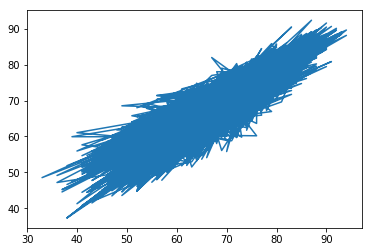

In [25]:
# Display the plot for test and predicted data. 

plt.plot(Y_test, Y_pred)

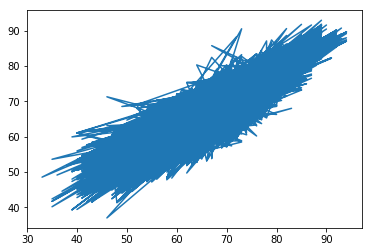

In [26]:
# Display the plot for traininig and predicted data. 

plt.plot(Y_train, Y_pred_train)